############################################################################################

################## -- Programa de Especialización en Data Science Nivel II --##########################

############################################################################################

Modelos de Clasificación : Modelos de Boosting - Adaboost - GBM

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [4]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [5]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [6]:
#Leer los primeros registros.
train.head(10) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### 4 IMPUTACION DE LA DATA

In [7]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [9]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [10]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [11]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [12]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [13]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
# Imputacion del Data Test
test_parametrica=test.copy()
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3


In [15]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [16]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [17]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [18]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [19]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [20]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
test_parametrica.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.70,0.31
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3,4576,4.84,0.35
2,LP001031,2.0,2,3.0,1,1.0,5000,1800,208.0,360.0,2.0,3,6800,5.34,0.58
3,LP001035,2.0,2,3.0,1,1.0,2340,2546,100.0,360.0,2.0,3,4886,4.61,0.28
4,LP001051,2.0,1,1.0,2,1.0,3276,0,78.0,360.0,2.0,3,3276,4.36,0.22
5,LP001054,2.0,2,1.0,2,2.0,2165,3422,152.0,360.0,2.0,3,5587,5.02,0.42
6,LP001055,1.0,1,2.0,2,1.0,2226,0,59.0,360.0,2.0,2,2226,4.08,0.16
7,LP001056,2.0,2,3.0,2,1.0,3881,0,147.0,360.0,1.0,1,3881,4.99,0.41
8,LP001059,2.0,2,3.0,1,1.0,13633,0,280.0,240.0,2.0,3,13633,5.63,1.17
9,LP001067,2.0,1,1.0,2,1.0,2400,2400,123.0,360.0,2.0,2,4800,4.81,0.34


In [21]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [22]:
# Partición Muestral de la Información
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                                   random_state=100)

In [23]:
# Puedo modelar la información sin balancear, sin embargo es necesario seleccionar las mejores variables

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
X_train.shape

(429, 14)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


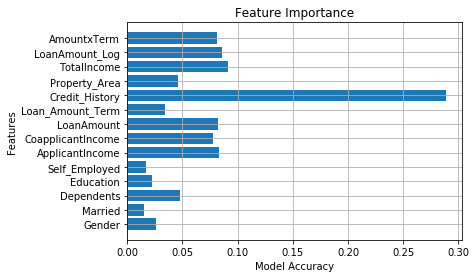

In [26]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_train.columns)
plt.grid(True)

In [27]:
# Puedo modelar la información balanceando y después seleccionar las mejores variables.

In [28]:
# Concatenamos las covariables y la variable dependiente del train para poder balancearlo
train_Xy = pd.concat([X_train, y_train], axis=1)

In [29]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_Xy.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



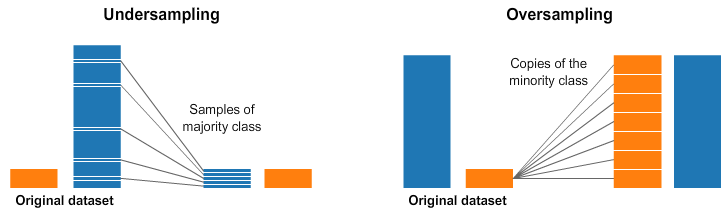

In [30]:
train_Xy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.62,0.28,1
13,2.0,1.0,1.0,1,1.0,1853,2840.0,114.0,360.0,2.0,1,4693.0,4.74,0.32,0
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.85,0.36,1


Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


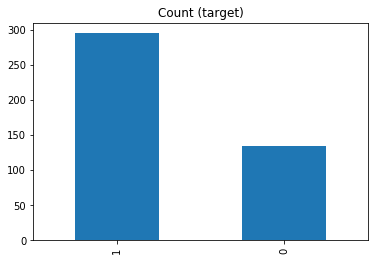

In [31]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_Xy.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [32]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_Xy.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_Xy[train_Xy['Loan_Status'] == 0]
df_class_1 = train_Xy[train_Xy['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


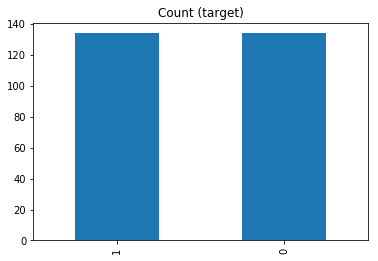

In [33]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


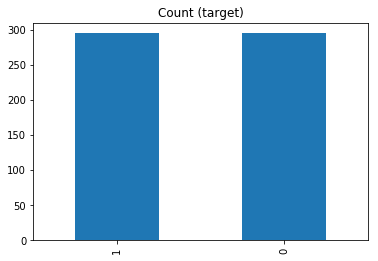

In [34]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');


### Métodos de Balanceo Sofisticados

#### RandomUnderSampling

In [35]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
X, y = train_Xy.drop('Loan_Status', axis=1), train_Xy['Loan_Status']


In [36]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

df_X_rus = pd.DataFrame(data=X_rus,columns=X.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [37]:
#df_balanceado_rus.head(10)
#df_balanceado_rus.describe()
#df_balanceado_rus.Loan_Status.value_counts()

#### RandomOverSampling

In [38]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

df_X_ros = pd.DataFrame(data=X_ros,columns=X.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [39]:
#df_balanceado_ros.head(2)
#df_balanceado_ros.describe()
#df_balanceado_ros.Loan_Status.value_counts()

#### Imputación TomekLink

La imputación TomekLink son pares de instancias muy cercanas, pero de clases opuestas. Eliminar las instancias de la clase mayoritaria de cada par aumenta el espacio entre las dos clases, lo que facilita el proceso de clasificación.

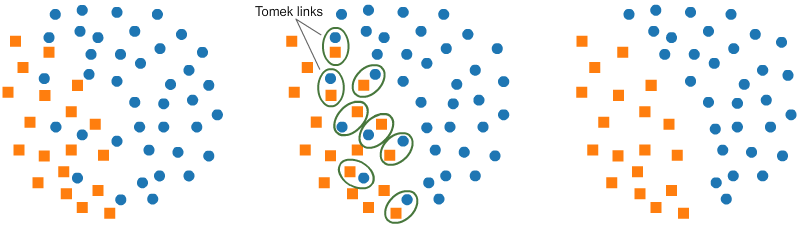

In [40]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)

df_X_tl = pd.DataFrame(data=X_tl,columns=X.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [41]:
#df_balanceado_tl.head(3)
#df_balanceado_tl.describe()
#df_balanceado_tl.Loan_Status.value_counts()

### Imputación UnderSampling: Centros de Conglomerados

Esta técnica realiza submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, pasaremos el dict {1: 192} para la relación de parámetros, para preservar 192 elementos de la clase mayoritaria (1) y todos los elementos de la clase minoritaria (0).

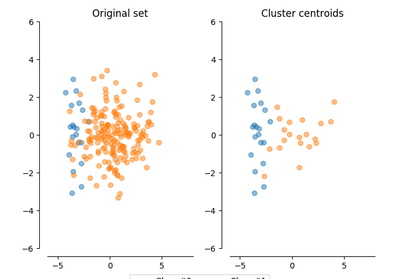

In [42]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 192})
X_cc, y_cc = cc.fit_sample(X, y)

df_X_cc = pd.DataFrame(data=X_cc,columns=X.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [43]:
#df_balanceado_cc.head(2)
#df_balanceado_cc.describe()
#df_balanceado_cc.Loan_Status.value_counts()

### Imputación OverSampling: SMOTE

SMOTE (Técnica de sobremuestreo de Minorías Sintéticas) consiste en la síntesis de elementos para la clase minoritaria, basados en los que ya existen. Funciona eligiendo al azar un punto de la clase minoritaria y calcula los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos.

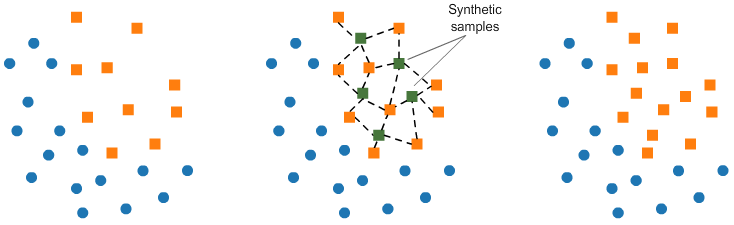

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

df_X_sm = pd.DataFrame(data=X_sm,columns=X.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [45]:
#df_balanceado_sm.head(2)
#df_balanceado_sm.describe()
#df_balanceado_sm.Loan_Status.value_counts()

### Imputación Over-sampling seguido de under-sampling (SMOTE + Tomek links)

Ahora, haremos una combinación de sobremuestreo y submuestreo, usando las técnicas de enlaces SMOTE y Tomek:

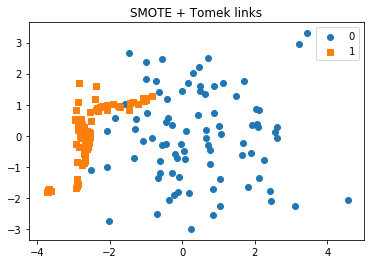

In [46]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

df_X_smt = pd.DataFrame(data=X_smt,columns=X.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [47]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
#df_balanceado_smt.Loan_Status.value_counts()


## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
X_ros.shape

(590, 14)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


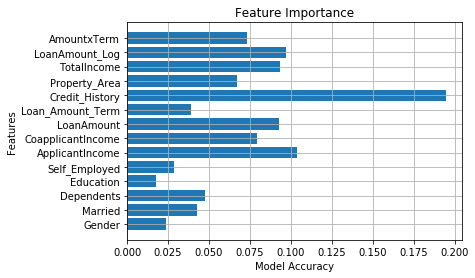

In [52]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_ros, y_ros)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


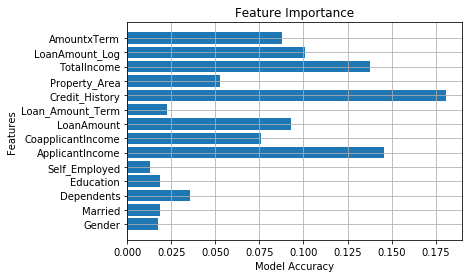

In [53]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC(n_jobs=2,n_estimators=50)
forest.fit(X_ros, y_ros)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [54]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from matplotlib import pyplot as plt

In [55]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =df_balanceado_ros.drop('Loan_Status',axis=1)
y_train = df_balanceado_ros['Loan_Status']

In [56]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(590, 14) (590,)
(185, 14) (185,)


### AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [58]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [59]:
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.762

	Precision: 0.817
	Recall: 0.843
	F1: 0.829



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [60]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.722


In [61]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        58
           1       0.82      0.84      0.83       127

   micro avg       0.76      0.76      0.76       185
   macro avg       0.72      0.71      0.72       185
weighted avg       0.76      0.76      0.76       185



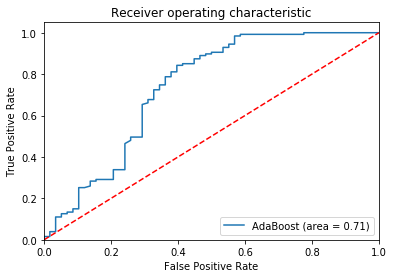

In [62]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [63]:
test_parametrica.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.7,0.31


In [64]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2.drop('Loan_ID',axis=1)

In [65]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = AdaBoost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_AdaBoost.csv', index=False)

### XGBoost

In [66]:
# Importamos la librería necesaria para el algoritmo
import xgboost as xgb

In [67]:
# En Xgboost necesitamos convertir nuestras matrices a matriz XGboost
# Uso eficiente de la memoria y entrenamiento rápido
dtrain=xgb.DMatrix(X_train,y_train)
dtest=xgb.DMatrix(X_test)

In [110]:
# Eligiendo los parámetros para XGBoost
parameters={'max_depth':7, 
            'eta':0.1, 'silent':1,
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05}
num_round=50
xg=xgb.train(parameters,dtrain,num_round) 

In [104]:
# Predecimos el Modelo entrenado sobre la data de test
ypred=xg.predict(dtest) 

In [98]:
# Tenemos las probabilidades predichas por el algoritmo, hay que convertirlas en clases.
for i in range(0,185): 
    if ypred[i]>0.5:       # setting threshold to .5 
       ypred[i]=1 
    else: 
       ypred[i]=0  

In [86]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61        58
           1       0.82      0.84      0.83       127

   micro avg       0.76      0.76      0.76       185
   macro avg       0.72      0.71      0.72       185
weighted avg       0.76      0.76      0.76       185



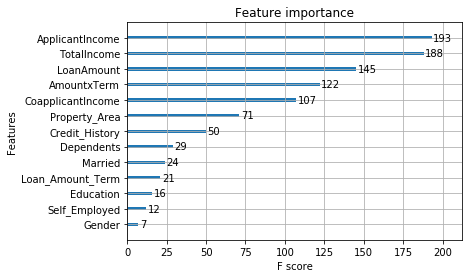

In [93]:
# Podemos calcular la importancia de variables por Xgboost
xgb.plot_importance(xg,importance_type='weight')

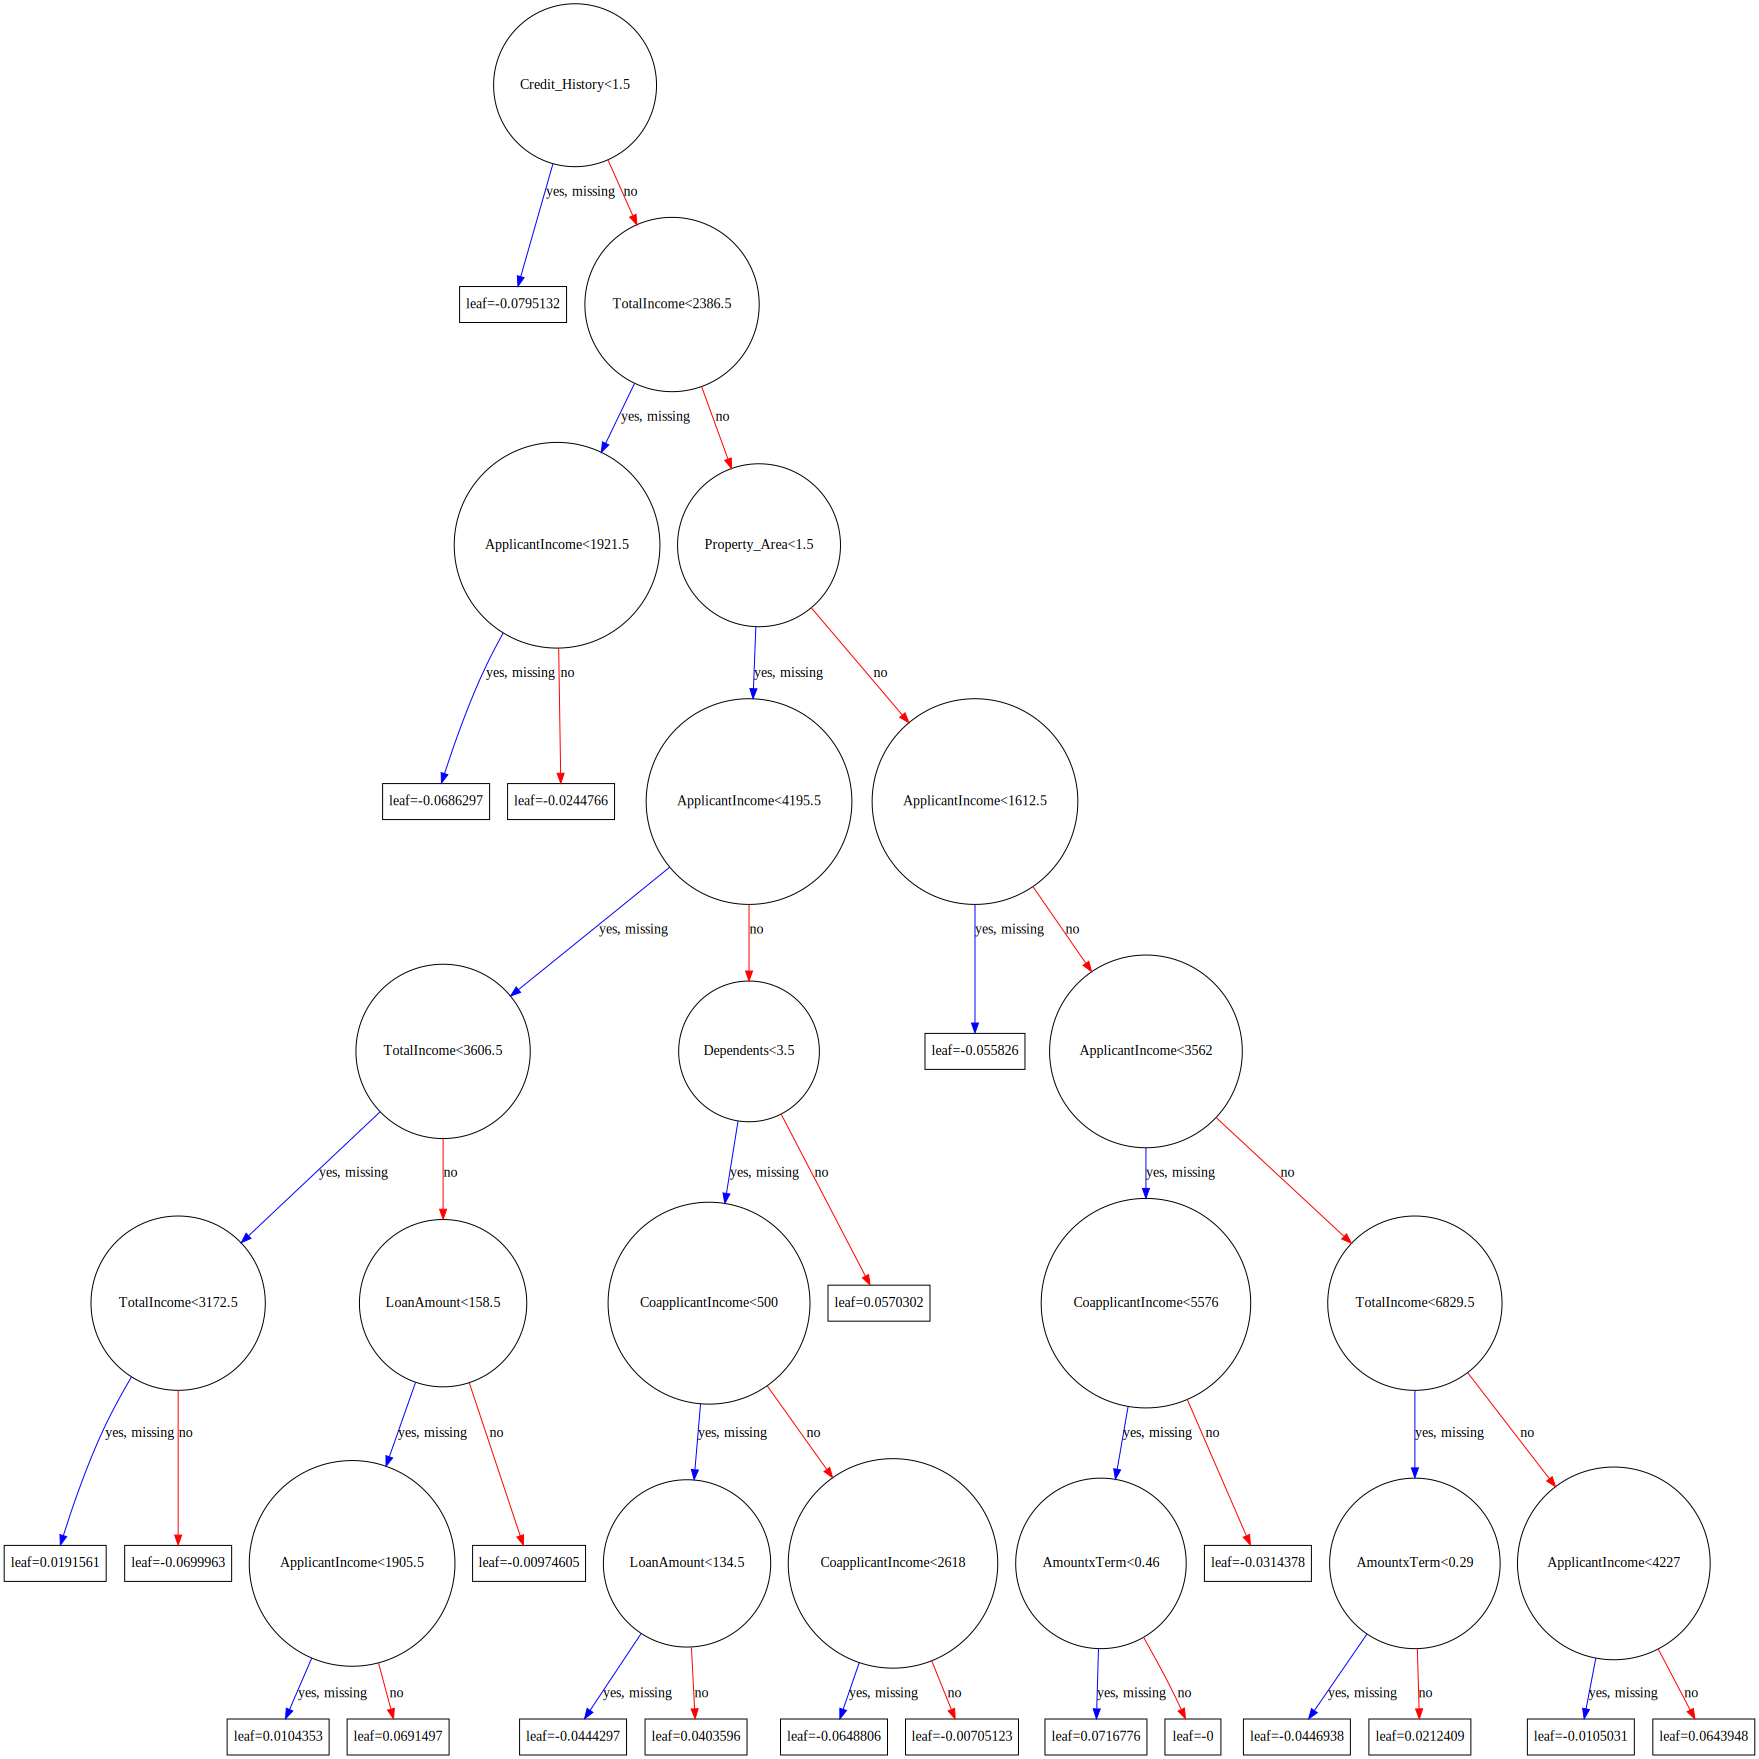

In [82]:
# Podemos ver algunos de los arboles y ver la ganancia en Acuraccy
xgb.to_graphviz(xg, num_trees=2)

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [94]:
test_parametrica.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.7,0.31


In [108]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2.drop('Loan_ID',axis=1)

In [112]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
dpred=xgb.DMatrix(df2) # La convertimos a una matriz XGboost
y_final = xg.predict(dpred) 

In [115]:
# Tenemos las probabilidades predichas por el algoritmo, hay que convertirlas en clases.
for i in range(0,367): 
    if y_final[i]>0.5:       # setting threshold to .5 
       y_final[i]=1 
    else: 
       y_final[i]=0  

In [116]:
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_Xgboost.csv', index=False)

### LightGBM

In [117]:
# Importamos la librería de LightGBM
import lightgbm as lgb

In [123]:
# Convertimos nuestra data de train y test en una matriz LightGBM
train_data=lgb.Dataset(X_train,label=y_train)


In [124]:
# Definimos los parámetros y ajustamos el algoritmos a la data
params = {'num_leaves':31, 'num_trees':100, 'objective':'binary','metric':'auc'}
LightGBM= lgb.train(params, train_data) 

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [125]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=LightGBM.predict(X_test)

In [127]:
# Convertimos las probabilidades en clases
for i in range(0,185):
    if y_pred[i]>0.5: 
        y_pred[i]=1
    else: 
        y_pred[i]=0

In [128]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        58
           1       0.78      0.85      0.81       127

   micro avg       0.73      0.73      0.73       185
   macro avg       0.68      0.66      0.67       185
weighted avg       0.72      0.73      0.72       185



In [131]:
# Predecimos y lo elevamos al submmit
y_final = LightGBM.predict(df2) 

In [132]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
# Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
for i in range(0,367): 
    if y_final[i]>=.5:       # setting threshold to .5 
       y_final[i]=1 
    else: 
       y_final[i]=0  
    
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('LightGBM.csv', index=False)

### CatBoost

In [133]:
from catboost import CatBoostClassifier
CatBoost=CatBoostClassifier(eval_metric="AUC",one_hot_max_size=10,
                            depth=3, iterations= 800, l2_leaf_reg= 2, 
                            learning_rate= 0.01)

In [135]:
# Ajustamos un modelo de clasificación
Cat=CatBoost.fit(X_train,y_train,cat_features=([ 0,1,2,3,4,9,10]))

0:	learn: 0.7051020	total: 60.1ms	remaining: 48s
1:	learn: 0.7906751	total: 68.1ms	remaining: 27.2s
2:	learn: 0.8227521	total: 77.5ms	remaining: 20.6s
3:	learn: 0.8160299	total: 86ms	remaining: 17.1s
4:	learn: 0.8109911	total: 95.5ms	remaining: 15.2s
5:	learn: 0.8114507	total: 104ms	remaining: 13.8s
6:	learn: 0.8204194	total: 113ms	remaining: 12.8s
7:	learn: 0.8190980	total: 121ms	remaining: 11.9s
8:	learn: 0.8221603	total: 129ms	remaining: 11.3s
9:	learn: 0.8246481	total: 137ms	remaining: 10.8s
10:	learn: 0.8347544	total: 145ms	remaining: 10.4s
11:	learn: 0.8371962	total: 153ms	remaining: 10s
12:	learn: 0.8397817	total: 161ms	remaining: 9.73s
13:	learn: 0.8391669	total: 169ms	remaining: 9.46s
14:	learn: 0.8384545	total: 177ms	remaining: 9.28s
15:	learn: 0.8384545	total: 184ms	remaining: 9.01s
16:	learn: 0.8433324	total: 192ms	remaining: 8.85s
17:	learn: 0.8409308	total: 200ms	remaining: 8.68s
18:	learn: 0.8374490	total: 208ms	remaining: 8.55s
19:	learn: 0.8374490	total: 214ms	remainin

177:	learn: 0.8732548	total: 1.74s	remaining: 6.09s
178:	learn: 0.8735421	total: 1.76s	remaining: 6.11s
179:	learn: 0.8734157	total: 1.77s	remaining: 6.1s
180:	learn: 0.8734042	total: 1.78s	remaining: 6.09s
181:	learn: 0.8732433	total: 1.79s	remaining: 6.08s
182:	learn: 0.8732433	total: 1.8s	remaining: 6.06s
183:	learn: 0.8735651	total: 1.8s	remaining: 6.04s
184:	learn: 0.8748980	total: 1.81s	remaining: 6.03s
185:	learn: 0.8750359	total: 1.82s	remaining: 6.01s
186:	learn: 0.8749095	total: 1.83s	remaining: 6s
187:	learn: 0.8753806	total: 1.84s	remaining: 5.98s
188:	learn: 0.8751278	total: 1.84s	remaining: 5.97s
189:	learn: 0.8750704	total: 1.85s	remaining: 5.95s
190:	learn: 0.8754266	total: 1.86s	remaining: 5.93s
191:	learn: 0.8756219	total: 1.87s	remaining: 5.92s
192:	learn: 0.8754496	total: 1.88s	remaining: 5.91s
193:	learn: 0.8765642	total: 1.89s	remaining: 5.89s
194:	learn: 0.8765642	total: 1.89s	remaining: 5.88s
195:	learn: 0.8758403	total: 1.9s	remaining: 5.86s
196:	learn: 0.87554

353:	learn: 0.9093249	total: 3.33s	remaining: 4.2s
354:	learn: 0.9094053	total: 3.34s	remaining: 4.19s
355:	learn: 0.9094743	total: 3.35s	remaining: 4.18s
356:	learn: 0.9102097	total: 3.36s	remaining: 4.17s
357:	learn: 0.9100029	total: 3.37s	remaining: 4.16s
358:	learn: 0.9101178	total: 3.37s	remaining: 4.14s
359:	learn: 0.9104625	total: 3.38s	remaining: 4.13s
360:	learn: 0.9106349	total: 3.39s	remaining: 4.12s
361:	learn: 0.9105774	total: 3.4s	remaining: 4.11s
362:	learn: 0.9114163	total: 3.41s	remaining: 4.1s
363:	learn: 0.9120712	total: 3.42s	remaining: 4.09s
364:	learn: 0.9119563	total: 3.43s	remaining: 4.08s
365:	learn: 0.9120483	total: 3.44s	remaining: 4.07s
366:	learn: 0.9119908	total: 3.44s	remaining: 4.06s
367:	learn: 0.9119563	total: 3.45s	remaining: 4.05s
368:	learn: 0.9120827	total: 3.46s	remaining: 4.04s
369:	learn: 0.9121517	total: 3.47s	remaining: 4.03s
370:	learn: 0.9121632	total: 3.48s	remaining: 4.02s
371:	learn: 0.9123240	total: 3.48s	remaining: 4.01s
372:	learn: 0.9

515:	learn: 0.9277219	total: 4.72s	remaining: 2.6s
516:	learn: 0.9277104	total: 4.73s	remaining: 2.59s
517:	learn: 0.9276645	total: 4.74s	remaining: 2.58s
518:	learn: 0.9275496	total: 4.75s	remaining: 2.57s
519:	learn: 0.9274002	total: 4.76s	remaining: 2.56s
520:	learn: 0.9275496	total: 4.77s	remaining: 2.56s
521:	learn: 0.9276530	total: 4.78s	remaining: 2.54s
522:	learn: 0.9277794	total: 4.79s	remaining: 2.54s
523:	learn: 0.9276760	total: 4.8s	remaining: 2.53s
524:	learn: 0.9278713	total: 4.81s	remaining: 2.52s
525:	learn: 0.9280781	total: 4.82s	remaining: 2.51s
526:	learn: 0.9282850	total: 4.82s	remaining: 2.5s
527:	learn: 0.9286067	total: 4.83s	remaining: 2.49s
528:	learn: 0.9286297	total: 4.84s	remaining: 2.48s
529:	learn: 0.9285722	total: 4.85s	remaining: 2.47s
530:	learn: 0.9286182	total: 4.86s	remaining: 2.46s
531:	learn: 0.9288251	total: 4.87s	remaining: 2.45s
532:	learn: 0.9290204	total: 4.87s	remaining: 2.44s
533:	learn: 0.9290204	total: 4.88s	remaining: 2.43s
534:	learn: 0.9

694:	learn: 0.9394542	total: 6.34s	remaining: 958ms
695:	learn: 0.9394772	total: 6.35s	remaining: 949ms
696:	learn: 0.9396380	total: 6.36s	remaining: 939ms
697:	learn: 0.9398104	total: 6.37s	remaining: 930ms
698:	learn: 0.9399483	total: 6.37s	remaining: 921ms
699:	learn: 0.9399023	total: 6.38s	remaining: 912ms
700:	learn: 0.9399138	total: 6.39s	remaining: 902ms
701:	learn: 0.9401321	total: 6.4s	remaining: 893ms
702:	learn: 0.9401781	total: 6.41s	remaining: 884ms
703:	learn: 0.9403045	total: 6.41s	remaining: 875ms
704:	learn: 0.9403849	total: 6.42s	remaining: 865ms
705:	learn: 0.9404079	total: 6.43s	remaining: 856ms
706:	learn: 0.9404309	total: 6.44s	remaining: 847ms
707:	learn: 0.9407986	total: 6.44s	remaining: 837ms
708:	learn: 0.9408331	total: 6.45s	remaining: 828ms
709:	learn: 0.9407641	total: 6.46s	remaining: 819ms
710:	learn: 0.9408676	total: 6.47s	remaining: 810ms
711:	learn: 0.9408905	total: 6.48s	remaining: 800ms
712:	learn: 0.9410169	total: 6.48s	remaining: 791ms
713:	learn: 0

In [136]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=Cat.predict(X_test)

In [137]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        58
           1       0.79      0.92      0.85       127

   micro avg       0.78      0.78      0.78       185
   macro avg       0.76      0.69      0.71       185
weighted avg       0.77      0.78      0.76       185



In [138]:
# Predecimos con el algoritmo sobre la data de test
y_final = Cat.predict(df2)

In [139]:
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('CatBoost.csv', index=False)

#### Modelos Supervisados : Ensamble de Modelos

In [140]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')

eclf.fit(X_train, y_train) 

VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB(priors=None, var_smoothing=1e-09)), ('Naive Bayes Multinomial', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)), ('Naive Bayes Bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [141]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf.predict(X_test)

In [142]:
# Podemos hallar indicadores de validacion

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.524

	Precision: 0.735
	Recall: 0.480
	F1: 0.581



In [143]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.62      0.45        58
           1       0.73      0.48      0.58       127

   micro avg       0.52      0.52      0.52       185
   macro avg       0.54      0.55      0.52       185
weighted avg       0.62      0.52      0.54       185



####  ELECCIÓN DEL MEJOR MODELO

In [144]:
# Selección del mejor modelo
# Cargamos todos los modelos que necesitamos

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [161]:
# Definimos un criterio de estratificación
kfolds = StratifiedKFold(shuffle=True, random_state=1)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [146]:
# Creamos una función de corrida de modelos
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

In [162]:
# Creamos las funciones de corridas de modelos

def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    run_model(RidgeClassifier(), X_train, y_train)
    run_model(MLPClassifier(max_iter=1000), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(BernoulliNB(), X_train, y_train)
    run_model(KNeighborsClassifier(), X_train, y_train)
    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(ExtraTreesClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)

In [163]:
# Podemos ver los resultados
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

In [164]:
# Corremos todos los modelos
run_linear_models(X, y)
run_misc_models(X, y)
run_ensemble_models(X, y)

LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier
XGBClassifier


In [167]:
# Podemos ver los resultados obtenidos
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.783784,0.0,0.851852,0.0,11
1,RidgeClassifier,0.789189,0.0,0.858182,0.0,4
2,MLPClassifier,0.643243,0.0,0.778523,0.0,83
3,BernoulliNB,0.589189,0.0,0.680672,0.0,4
4,KNeighborsClassifier,0.567568,0.0,0.669421,0.0,7
5,DecisionTreeClassifier,0.718919,0.0,0.795276,0.0,7
6,RandomForestClassifier,0.681081,0.0,0.761134,0.0,19
7,ExtraTreesClassifier,0.762162,0.0,0.838235,0.0,17
8,AdaBoostClassifier,0.762162,0.0,0.829457,0.0,104
9,GradientBoostingClassifier,0.740541,0.0,0.818182,0.0,84


In [166]:
#### Tabla de Resultados con todos nuestros modelos ordenados por algún criterio
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
1,RidgeClassifier,0.789189,0.0,0.858182,0.0,4
0,LogisticRegression,0.783784,0.0,0.851852,0.0,11
8,AdaBoostClassifier,0.762162,0.0,0.829457,0.0,104
7,ExtraTreesClassifier,0.762162,0.0,0.838235,0.0,17
10,XGBClassifier,0.740541,0.0,0.816794,0.0,44
9,GradientBoostingClassifier,0.740541,0.0,0.818182,0.0,84
5,DecisionTreeClassifier,0.718919,0.0,0.795276,0.0,7
6,RandomForestClassifier,0.681081,0.0,0.761134,0.0,19
2,MLPClassifier,0.643243,0.0,0.778523,0.0,83
3,BernoulliNB,0.589189,0.0,0.680672,0.0,4
